# Midterm - DS3000 (100 pts + 15 Bonus)

### Student Name: xxxxxxxx
### Student ID: xxxxxxxx

## General comments

* This Midterm integrates knowledge and skills acquired in the first half of the semester, especially in the Assignments. 

* You **are allowed** to use any document and sources on your computer and look up documents on the internet. You need to **cite any code that you use if it is NOT from the course** Labs or Tutorial examples. 

* You are **NOT allowed to use chatbots**. 

* You are **NOT allowedto share documents, or communicate**  in any other way with people inside or outside the class during the Midterm.

* To finish the Midterm in the alloted **2 hrs**, you will have to work efficiently. **Read the entirety of each question carefully.** 

* You need to submit the Midterm **at 10:30 am on OWL in the Assignments/Midterm** section where you downloaded the data set and notebook. Late submission will be scored with 0 pts, unless you have received extra accommodation. To avoid technical difficulties, start your submission at latest five to ten minutes before the deadline. To be sure, you can also submit multiple version - only the latest version will be graded.  

* Some question demand a **Written Answer** - answer these in a full English sentence. 

* For your Figures, ensure that all axes are **labeled** in an informative way. 

* Ensure that your **code runs correctly** by choosing "Kernel -> Restart and Run All" before submitting. 

### Additional Guidance

If at any point you are not sure about the answer, then *write your assumptions clearly in your exam and proceed according to those assumptions.*

Good luck!

In [37]:
## Preliminaries

### YOU MAY ADD ADDITIONAL IMPORTS IF YOU WISH

import matplotlib
import matplotlib.pyplot as plt 
%matplotlib inline
import pandas as pd 
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, validation_curve
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LogisticRegression
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures, StandardScaler
from sklearn.metrics import confusion_matrix, roc_curve, auc, mean_absolute_error, mean_squared_error, r2_score, accuracy_score
from sklearn.svm import SVC
from sklearn.utils import resample
from datetime import datetime
 

## Dataset 

This exam objective is to develop a data-driven predictive model for the price of properties.  
You will be working with a dataset called `Property_Price`. You need to download this dataset from OWL in the Assignments/Midterm. Below, we provide a detailed description of each variable in the dataset:

-	**ID**: the property's identification
-	**MSSubClass**: The building class
-	**LotArea**: Lot size in square feet
-	**LandSlope**: Slope of property
-	**HouseStyle**: Style of dwelling
-	**OverallQual**: Overall material and finish quality
-	**OverallCond**: Overall condition rating
-	**YearBuilt**: Original construction date
-	**MasVnrArea**: Masonry veneer area in square feet
-	**TotalBsmtSF**: Total square feet of basement area
-	**Heating**: Type of heating
-	**CentralAir**: Central air conditioning
-	**1stFlrSF**: First Floor square feet
-	**2ndFlrSF**: Second floor square feet
-	**GrLivArea**: Above grade (ground) living area square feet
-	**FullBath**: Full bathrooms above grade
-	**HalfBath**: Half baths above grade
-	**BedroomAbvGr**: Number of bedrooms above basement level
-	**TotRmsAbvGrd**: Total rooms above grade (does not include bathrooms)
-	**Fireplaces**: Number of fireplaces
-	**GarageCars**: Size of garage in car capacity
-	**GarageArea**: Size of garage in square feet
-	**PavedDrive**: Paved driveway
-	**WoodDeckSF**: Wood deck area in square feet
-	**OpenPorchSF**: Open porch area in square feet
-	**MiscVal**: $Value of miscellaneous feature
-	**YrSold**: Year Sold
-	**SalePrice**: the property's sale price in dollars. This is the target variable that you're trying to predict.







## Question1: Regression (60 pts)

### Q1.1: Data Preparation (15pts)

Load the dataset and perform necessary preprocessing steps and feature engineering:

- Remove rows with any null values. 

- Remove the `Id` column from your dataframe. 

- Find the age of property using `YearBuilt` variable and replace `YearBuilt` with the new variable `PropertyAge`.

- Use `YrSold` variable to calculate how many years ago the property was sold and name that new coulmn `YrsSinceSale` and replace `YrSold`.

- Encode all categorical columns (One-hot encoding). 

- **Written Answer**: How many new columns were added?

- **Written Answer**: Explain the choice of One-hot encoding for categorical variables and the potential issues with dimensionality.


In [38]:
# Load the data
data = pd.read_csv('Property_Price.csv')
# data.info()
data = data.dropna()
print(data.isnull().sum())

data.drop('Id', axis=1, inplace=True)

# Get the current year
current_year = datetime.now().year

# Calculate the age of each property
data['PropertyAge'] = current_year - data['YearBuilt']

# Display the DataFrame with the new 'PropertyAge' column
# print(data[['YearBuilt', 'PropertyAge']])

# Calculate how many years ago each property was sold
data['YrsSinceSale'] = current_year - data['YrSold']
data.drop(['YearBuilt','YrSold'], axis=1, inplace=True)

categorical_cols = data.select_dtypes('object').columns

# One-hot encode the categorical columns
data_encoded = pd.get_dummies(data, columns=categorical_cols)

data_encoded.info()


Id              0
MSSubClass      0
LotArea         0
LandSlope       0
HouseStyle      0
OverallQual     0
OverallCond     0
YearBuilt       0
MasVnrArea      0
TotalBsmtSF     0
Heating         0
CentralAir      0
1stFlrSF        0
2ndFlrSF        0
GrLivArea       0
FullBath        0
HalfBath        0
BedroomAbvGr    0
TotRmsAbvGrd    0
Fireplaces      0
GarageCars      0
GarageArea      0
PavedDrive      0
WoodDeckSF      0
OpenPorchSF     0
MiscVal         0
YrSold          0
SalePrice       0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1452 entries, 0 to 1459
Data columns (total 44 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MSSubClass         1452 non-null   int64  
 1   LotArea            1452 non-null   int64  
 2   OverallQual        1452 non-null   int64  
 3   OverallCond        1452 non-null   int64  
 4   MasVnrArea         1452 non-null   float64
 5   TotalBsmtSF        1452 non-null   

**Written Answer**:  44-27 =  15 new columns were added

**Written Answer**: One-hot encoding is used to convert categorical variables into numerical so that ML algorithms do a better job in prediction. However, this can lead to a high-dimensional feature space (known as the curse of dimensionality), which can make the model complex and overfit. Feature selection or dimensionality reduction techniques like PCA may sometimes be necessary to address this.

### Q1.2: Data Splitting (5pts)

- Separate `SalePrice` as the target variable for your machine learning model (Regression). 
- Split your preprocessed dataset by setting aside 20 percent of data for testing, and the rest for training. *Make sure to set the random_state to 42 if you are using a sklearn function to accomplish this. 


In [39]:
# Identify features and target variable 
X = data_encoded.drop('SalePrice', axis = 'columns').values

y = data_encoded.SalePrice

# Splitting data 
Xtrain, Xtest, ytrain, ytest = train_test_split(X,
                                                y, 
                                                test_size =0.20, random_state=42)



### Q1.3: Build a Linear Regression model (15pts)
- Build a model to predict SalePrice as a `linear function` of the other variables (features) in the dataset. In order to properly build the regression model, the features need to be `standardized`. Build a `pipeline` that **standardizes the features** and **creates a linear regression model**.
- Report the Mean Squared Error (MSE) to evaluate both the training and test performance of your model.
- **Written Answer**:Explain the potential reasons for the observed MSE and discuss strategies for improvement.

In [40]:
myLinearModel = Pipeline([
    ('standardize', StandardScaler()),
    ('linear_regression', LinearRegression())
  ])

myLinearModel.fit(Xtrain, ytrain)

trainingPreds = myLinearModel.predict(Xtrain)
testPreds = myLinearModel.predict(Xtest)

trainingMSE = mean_squared_error(ytrain, trainingPreds)
testMSE = mean_squared_error(ytest, testPreds)

print('Trianing MSE:',trainingMSE )
print('Test MSE:',testMSE )

Trianing MSE: 1294226072.3438902
Test MSE: 3.2227502144136768e+32


**Written Answer**: A high MSE indicates poor model performance, which could be due to non-linearity in the data, outliers, or irrelevant features. Improvements could include transforming features to better capture the relationship, removing outliers, or using a more complex model that can capture the data's structure better.

### Q1.4: Regularization and Hyperparameter Tuning (25pts)

1. Use L2 regularization by adding a penalty of $\alpha$ to the regression model: $\alpha \sum_{i}{\theta_i^2}$  (where $\theta_i$ are your regression coefficients). Vary the regularization parameter $\alpha$  between 0.2 and 250, evenly spaced in log-space, and generate 50 values. 
2. Build the `pipeline` that **standardizes the features** and **create the regularized regression model**.
3. Define a grid of regularization parameters for hyperparameter tuning for different values of $\alpha$ (using gridsearch and cv=10). Use MSE as evaluation criterion (*hint: use 'neg_mean_squared_error' as scoring*).  
4. Make a plot of the mean validation scores vs $\alpha$.  
5. Report the best (optimum) $\alpha$ that you found.
6. Evaluate the the model performance on the test set using the best $\alpha$ and report test MSE.
7. **Written Answer"**:What was the impact of regularization on the model's performance? How does the regularization parameter alpha influence the model?



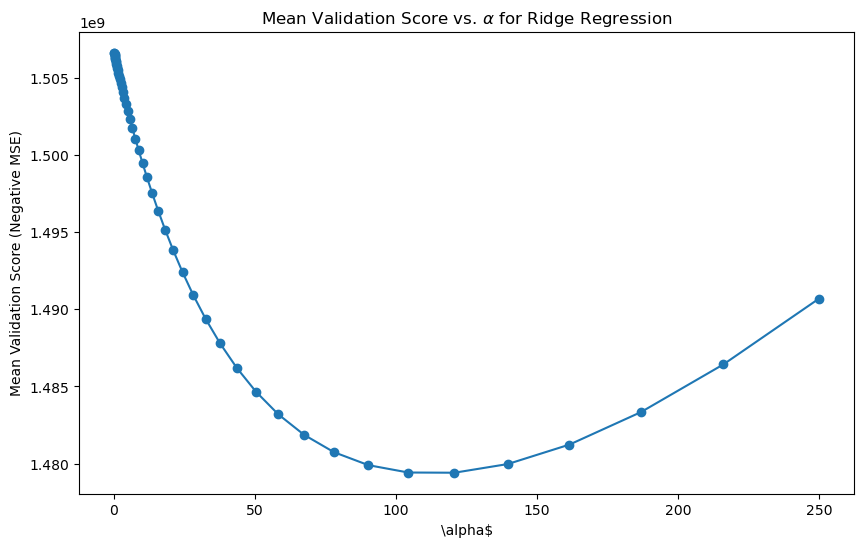

Best alpha: {'ridge__alpha': 120.76157897609576}
Mean Squared Error: 973756622.9817563


In [41]:
# Define the model
Ridge_pipe = Pipeline([
    ('scale', StandardScaler()),
    ('ridge', Ridge()) 
    ])


# Define a grid of alpha values for hyperparameter tuning
alpha_values = np.exp(np.linspace(np.log(0.2),np.log(250),50))

param_grid = {'ridge__alpha': alpha_values}

# Setup the grid search
grid_search = GridSearchCV(Ridge_pipe, param_grid, cv=30, scoring='neg_mean_squared_error', return_train_score=True)

# Perform the grid search
grid_search.fit(Xtrain, ytrain)

# Extract the mean validation scores
mean_test_scores = grid_search.cv_results_['mean_test_score']

# Convert to positive because the scores are negative mean squared errors
mean_test_scores = -mean_test_scores

# Extract the alpha values (the grid parameters)
alphas = grid_search.cv_results_['param_ridge__alpha'].data

# Plotting the mean validation scores vs. alpha values
plt.figure(figsize=(10, 6))
plt.plot(alphas, mean_test_scores, marker='o')

# Add some helpful labels and title
plt.xlabel(r'\alpha$')
plt.ylabel(r'Mean Validation Score (Negative MSE)')
plt.title(r'Mean Validation Score vs. $\alpha$ for Ridge Regression')

# Show the plot
plt.show()



# Evaluate the model
best_model = grid_search.best_estimator_
predictions = best_model.predict(Xtest)
mse = mean_squared_error(ytest, predictions)
print(f'Best alpha: {grid_search.best_params_}')
print(f'Mean Squared Error: {mse}')

**Written Answer:** Choosing the optimal regularization parameter helps to find a good balance the bias-variance trade-off, where the model is complex enough to capture underlying patterns but not so complex that it becomes sensitive to noise in the training data.

## Question 2  - Classification (40 pts)

### Q2.1: Logistic Regression (LR) (20pts)
1. Convert the problem into a binary classification by changing the taget variable. Use the train and test sets from Q1.2. If `SalePrice` is above median value (inclusive) will be assigned 1, and 0 otherwise. 
2. Perform logistic regression`. Evaluate the model generalization using `confusion matrix` and `accuracy` metrics and report them.
3. Plot ROC curve and report AUC. 
4. **Written Answer** Discuss the choice of converting the regression problem into a binary classification task and its practical implications.
5. **Written Answer** Analyze the confusion matrix results and discuss the balance between false positives and false negatives.

Confusion Matrix:
[[139  10]
 [ 10 132]]
Test Accuracy: 0.9313
ROC AUC: 0.9848


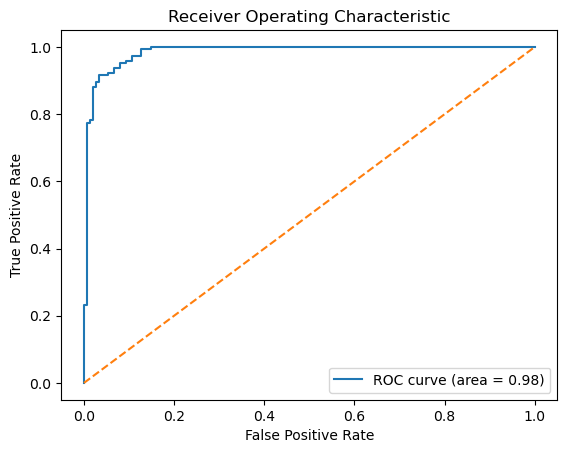

In [42]:
# Convert to binary classification problem
median_price = ytrain.median()
ytrain_binary = (ytrain >= median_price).astype(int)
ytest_binary = (ytest >= median_price).astype(int)

# Define and fit the logistic regression model
logistic_model = LogisticRegression(max_iter=10000)
logistic_model.fit(Xtrain, ytrain_binary)

# Predictions
ytest_pred = logistic_model.predict(Xtest)

# Confusion matrix
conf_matrix = confusion_matrix(ytest_binary, ytest_pred)
print("Confusion Matrix:")
print(conf_matrix)


test_accuracy = accuracy_score(ytest_binary, ytest_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")

# ROC and AUC
ytest_pred_proba = logistic_model.predict_proba(Xtest)[:, 1]
fpr, tpr, thresholds = roc_curve(ytest_binary, ytest_pred_proba)
roc_auc = auc(fpr, tpr)
print(f"ROC AUC: {roc_auc:.4f}")

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--')  # Diagonal line for random chance
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

**Written Answer:** Converting a regression problem to binary classification simplifies the problem and may make it more interpretable for certain business decisions, such as identifying whether a house will sell above or below the median price. However, it also loses information because the exact price predictions are not made, if needed.


**Written Answer:** The confusion matrix shows an equal number of false positives and false negatives (10 each). This balance is generally positive because it indicates that the model does not exhibit a bias towards one type of error over the other. 



### Q2.2: Support Vector Machine (SVM) (20pts)

1. Define an SVM classification model and choose a range of ten (10) values for regularization parameter `C` between 0.01 and 10, evenly spaced in log-space.
2. Calculate the mean and standard deviation for the training scores and validation score using 10 fold validation_curve with `accuracy` metric. 
3. Find the best C and report its value. 
4. Calculate and report test accuracy using best C value.
5. Plot ROC curve and report AUC. 
6. **Written Answer**: to compare SVM results with Logistic Regression's in Q2.1, what do you conclude according to their test AUC and Accuracy values. Comprehensively explain.


The best C value is: 10.0 with a mean validation score of: 0.830297671676982
Test set accuracy using the best C value (10.0): 0.8797
ROC AUC: 0.9848


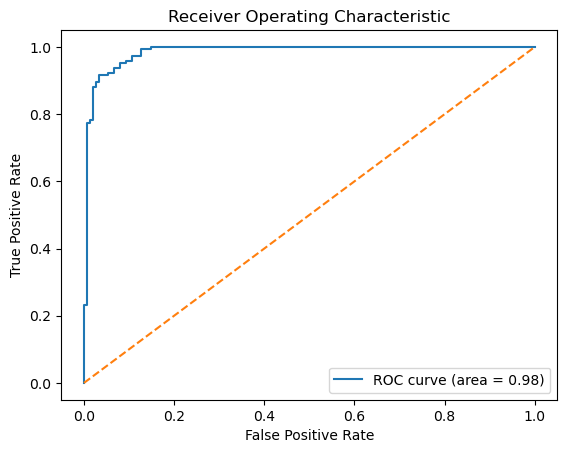

In [43]:
# Define the SVM classification model
svm_model = SVC()

# Choose a range of ten C values equally spaced on a log scale between 0.001 to 1000
C_values = np.logspace(-2, 1, 10)

# Calculate the training and test scores using 10-fold cross-validation
train_scores, valid_scores = validation_curve(
    estimator=svm_model, X=Xtrain, y=ytrain_binary, param_name="C", param_range=C_values,
    cv=10, scoring='accuracy', n_jobs=-1)

# Calculate the mean and standard deviation for training set scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)

# Calculate the mean and standard deviation for validation set scores
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

# Find the best C value and its corresponding mean validation score
best_C_index = np.argmax(valid_scores_mean)
best_C = C_values[best_C_index]
best_score = valid_scores_mean[best_C_index]

# Report the best C value
print(f"The best C value is: {best_C} with a mean validation score of: {best_score}")

# Now we train a new model on the full training set using the best C value and evaluate on the test set
svm_best = SVC(C=best_C, max_iter=10000)
svm_best.fit(Xtrain, ytrain_binary)

# Predict and calculate accuracy on the test set
ytest_pred = svm_best.predict(Xtest)
test_accuracy = accuracy_score(ytest_binary, ytest_pred)

# Report the test set accuracy
print(f"Test set accuracy using the best C value ({best_C}): {test_accuracy:.4f}")

ytest_pred_proba = logistic_model.predict_proba(Xtest)[:, 1]
fpr, tpr, thresholds = roc_curve(ytest_binary, ytest_pred_proba)
roc_auc = auc(fpr, tpr)
print(f"ROC AUC: {roc_auc:.4f}")

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--')  # Diagonal line for random chance
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

**Written Answer**: The equality of AUC scores suggests that both models have a similar ability to rank positive cases higher than negative ones over the range of possible thresholds. However, logistic regression might be doing better at the specific threshold that defines the "positive" class in your test accuracy calculation.

## Question 3 - Model Uncertainty (15 Bonus pts)

- Estimate the confidence interval of the performance of either Logistic Regression or SVM models, you created above in Q3, using the bootstrap method with 10 bootstrap samples.
- **Written Answer:** Discuss the significance of the 95% confidence interval in the context of model performance.How can the concept of uncertainty in model predictions impact decision-making processes?

**Both of the Following Answers are acceptable**

In [44]:
# Number of bootstrap samples
n_iterations = 10
# To store the scores
bootstrap_scores = []

# Run bootstrap
for i in range(n_iterations):
    # Prepare train and test sets
    Xtrain_bootstrap, ytrain_bootstrap = resample(Xtrain, ytrain_binary)
    
    # Fit the bootstrapped model
    bootstrapped_model = SVC(C=best_C)
    bootstrapped_model.fit(Xtrain_bootstrap, ytrain_bootstrap)
    
    # Evaluate model
    ypred = bootstrapped_model.predict(Xtest)
    score = accuracy_score(ytest_binary, ypred)
    bootstrap_scores.append(score)

# Calculate 95% confidence interval
alpha = 0.95
lower_bound = np.percentile(bootstrap_scores, (1 - alpha)/2 * 100)
upper_bound = np.percentile(bootstrap_scores, (alpha + (1 - alpha)/2) * 100)
print(f'95% Confidence interval for the SVM model accuracy: [{lower_bound:.2f}, {upper_bound:.2f}]')

95% Confidence interval for the SVM model accuracy: [0.86, 0.88]


In [45]:
# Number of bootstrap samples
n_iterations = 10
# To store the scores
bootstrap_scores = []

# Run bootstrap
for i in range(n_iterations):
    # Prepare train and test sets
    Xtrain_bootstrap, ytrain_bootstrap = resample(Xtrain, ytrain_binary)
    
    # Fit the bootstrapped model
    bootstrapped_model = LogisticRegression(max_iter=10000)
    bootstrapped_model.fit(Xtrain_bootstrap, ytrain_bootstrap)
    
    # Evaluate model
    ypred = bootstrapped_model.predict(Xtest)
    score = accuracy_score(ytest_binary, ypred)
    bootstrap_scores.append(score)

# Calculate 95% confidence interval
alpha = 0.95
lower_bound = np.percentile(bootstrap_scores, (1 - alpha)/2 * 100)
upper_bound = np.percentile(bootstrap_scores, (alpha + (1 - alpha)/2) * 100)
print(f'95% Confidence interval for the LR model accuracy: [{lower_bound:.2f}, {upper_bound:.2f}]')

95% Confidence interval for the LR model accuracy: [0.91, 0.95]


**Written Answer:** The confidence interval suggests that the model's accuracy is expected to lie between 86% and 88% for SVM (or 91% and 95% for LR) for different samples of the population, with a 95% level of confidence. The relatively narrow range indicates consistent performance across various sets of data, suggesting that the model is stable. This is useful for estimating how well the model will generalize to new, unseen data.
Decision-makers can use the confidence interval to gauge the reliability of the model. If the lower bound of the interval meets or exceeds the minimum acceptable performance threshold for the task, the model can be considered reliable.
